In [1]:
# example of grouping plots

In [2]:
# blocks must be contained in either code/endcode blocks or as individual

In [3]:
# executable py files in jupyter_notebook_cells

In [4]:
# TODO: link these into the makefile for the notebook

In [5]:
# cell source file: jupyter_notebook_cells/plotting_import.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
NX = 100
NY = 100
df = pd.DataFrame.from_dict({"id":["id1"] * NX + ["id2"] * NX,
                             "label":["a"] * NX + ["b"] * NX, 
                             "time":list(np.linspace(0, 1, NX)) + list(np.linspace(0, 1, NX)),
                             "dist":list(np.random.normal(loc=.3, size=NX)) + list(np.random.normal(loc=.25, size=NX)),
                             "value":list(np.linspace(1, 2, NX) + np.random.random(NX) * 0.1) + list(np.linspace(1.5, 2.5, NX) + np.random.random(NX) * 0.2)})
df.head()


,id,label,time,dist,value
0,id1,a,0.000000,0.060586,1.098303
1,id1,a,0.010101,-1.102275,1.060837
2,id1,a,0.020202,-1.192423,1.047480
3,id1,a,0.030303,0.964284,1.073486
4,id1,a,0.040404,-0.067746,1.056694


In [7]:
# histogram of "value" for each id
df_group1 = df.groupby("id")[["id", "value"]].get_group("id1")


Here we show some results


/home/jedmiston/anaconda2/envs/jup/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


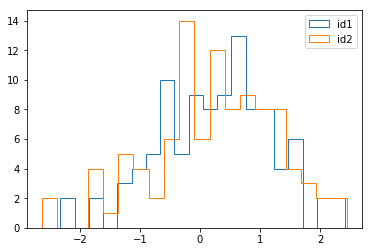

In [8]:
grped = df.groupby("id")
fig, ax = plt.subplots(1, 1)
for g in grped.groups.keys():
    dg = grped.get_group(g)
    ax.hist(dg["dist"], bins=20, histtype="step", stacked=False, label=g)
    pass
ax.legend()
fig.show()


 can  this be produced in one line?


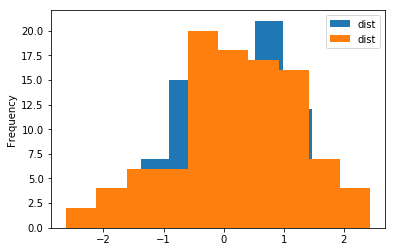

In [9]:
fig, ax = plt.subplots(1, 1)
df.groupby("id")[["id", "dist"]].plot(kind="hist", ax=ax, label="id", by="id")
ax.legend()
fig.show()


reference [ref](https://stackoverflow.com/questions/29975835/how-to-create-pandas-groupby-plot-with-subplots)


some results


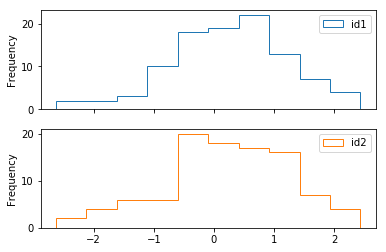

In [10]:
df["idd"] = df.index
out = pd.pivot_table(df.reset_index(), index="idd", values="dist", columns="id").plot(subplots=True, kind="hist", histtype="step", stacked=True)
out[0].figure.show()


In [11]:
out = pd.pivot_table(df.reset_index(), index="index", values="dist", columns="id")
out.head()


id,id1,id2
index,,
0,0.060586,NaN
1,-1.102275,NaN
2,-1.192423,NaN
3,0.964284,NaN
4,-0.067746,NaN


more results


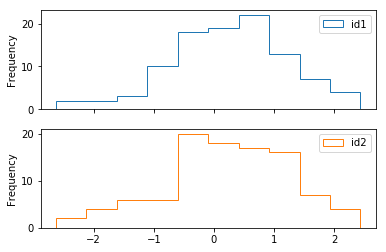

In [12]:
out = pd.pivot_table(df.reset_index(), index="index", values="dist", columns="id").plot(subplots=True, kind="hist", histtype="step", stacked=True)
out[0].figure.show()


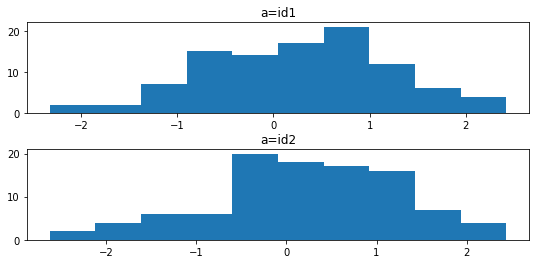

In [13]:
rowlength = int(grped.ngroups/2)                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(9,4), 
                        nrows=2, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.hist(grped.get_group(key)["dist"])
    ax.set_title("a=%s"%key)
    pass


In [14]:
#